In [4]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

/home/julius/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Parsing and cleaning

In [5]:
with open('data_v4.json', encoding="utf-8") as json_file:
    data = json.load(json_file)
df = pd.json_normalize(data)

In [4]:
df.dtypes

Name                               object
CVR                                object
BusinessAddress                    object
StartDate                          object
Status                             object
IndustryCode                       object
IndustryName                       object
Area                               object
AreaCode                           object
NumEmployees                       object
DirectorName                       object
DirectorAddress                    object
DirectorId                         object
RegisteredCapital                 float64
RegisteredCapitalCurrency          object
NumPeople                         float64
NumCars                           float64
DistanceToBusinessMeters          float64
DistanceToBusinessDriveSeconds    float64
DirectorAddressLatitude           float64
DirectorAddressLongitude          float64
BusinessAddressLatitude           float64
BusinessAddressLongitude          float64
dtype: object

In [5]:
nan_count = df.isna().sum()

print(nan_count)

Name                                0
CVR                                 0
BusinessAddress                     0
StartDate                           0
Status                              0
IndustryCode                        0
IndustryName                        0
Area                                0
AreaCode                            0
NumEmployees                        0
DirectorName                        0
DirectorAddress                    72
DirectorId                          0
RegisteredCapital                   0
RegisteredCapitalCurrency           0
NumPeople                          73
NumCars                            73
DistanceToBusinessMeters          191
DistanceToBusinessDriveSeconds    191
DirectorAddressLatitude            72
DirectorAddressLongitude           72
BusinessAddressLatitude            95
BusinessAddressLongitude           95
dtype: int64


In [6]:
df

,Name,CVR,BusinessAddress,StartDate,Status,IndustryCode,IndustryName,Area,AreaCode,NumEmployees,...,RegisteredCapital,RegisteredCapitalCurrency,NumPeople,NumCars,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds,DirectorAddressLatitude,DirectorAddressLongitude,BusinessAddressLatitude,BusinessAddressLongitude
0,POULSEN & HANSEN A/S,76958211,"C/O Flethøj Ejendomsadministration ApS, Energi...",1985-01-17,NORMAL,682040,Udlejning af erhvervsejendomme,København,101,6,...,500000.0,DKK,1.0,6.0,3237.0,606.0,55.671052,12.561257,55.657727,12.557978
1,SWEDISH ORPHAN BIOVITRUM A/S,19179079,Sorgenfrivej 17,1996-02-08,NORMAL,464610,Engroshandel med medicinalvarer og sygeplejear...,Lyngby-Taarbæk,173,11,...,500000.0,DKK,1.0,0.0,696252.0,35422.0,59.260329,18.194250,55.137627,14.758286
2,Oticon Denmark A/S,42338028,Kongebakken 9,1972-05-26,NORMAL,465220,Engroshandel med telekommunikationsudstyr,Egedal,240,61,...,1000000.0,DKK,0.0,6.0,383203.0,18336.0,55.762723,12.549633,57.486851,10.337708
3,BADEN-JENSEN A/S,29167613,Baltorpbakken 16,1970-02-19,NORMAL,467320,"Engroshandel med lak, maling, tapet, gulvbelæg...",Ballerup,151,37,...,3600000.0,DKK,0.0,0.0,30477.0,1455.0,55.816496,12.544167,55.731771,12.338362
4,REITAN CONVENIENCE DENMARK A/S,15516046,Buddingevej 195,1991-10-01,NORMAL,829900,Anden forretningsservice i.a.n.,Gladsaxe,159,63,...,7000000.0,DKK,NaN,NaN,NaN,NaN,NaN,NaN,55.751531,12.496268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,a-round ApS,36082577,Kronborg 10B,2014-08-30,NORMAL,620100,Computerprogrammering,Helsingør,217,12,...,50000.0,DKK,0.0,0.0,1434.0,240.0,56.030743,12.602363,56.039332,12.621799
2695,A-STORM ApS,35856803,"Naverland 31, 1.",2014-05-20,NORMAL,433900,Anden bygningsfærdiggørelse,Albertslund,165,2,...,50000.0,DKK,NaN,NaN,NaN,NaN,NaN,NaN,55.678331,12.374039
2696,A KASSEN ApS,35630635,"Birkedommervej 29, 2.",2014-01-06,NORMAL,900300,Kunstnerisk skaben,København,101,4,...,50000.0,DKK,0.0,18.0,3712.0,698.0,55.687047,12.530250,55.708563,12.527957
2697,S.A.A. ApS,36046090,Valby Langgade 74,2014-07-15,NORMAL,563000,"Cafeér, værtshuse, diskoteker mv.",København,101,1,...,50000.0,DKK,0.0,14.0,11.0,2.0,55.666129,12.512267,55.666147,12.512441


In [7]:
df["RegisteredCapital"].sum()

33865819054.35

In [8]:
df[['NumEmployees', 'RegisteredCapital', 'NumPeople', 'NumCars', 'DistanceToBusinessMeters', 'DistanceToBusinessDriveSeconds']]

,NumEmployees,RegisteredCapital,NumPeople,NumCars,DistanceToBusinessMeters,DistanceToBusinessDriveSeconds
0,6,500000.0,1.0,6.0,3237.0,606.0
1,11,500000.0,1.0,0.0,696252.0,35422.0
2,61,1000000.0,0.0,6.0,383203.0,18336.0
3,37,3600000.0,0.0,0.0,30477.0,1455.0
4,63,7000000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2694,12,50000.0,0.0,0.0,1434.0,240.0
2695,2,50000.0,NaN,NaN,NaN,NaN
2696,4,50000.0,0.0,18.0,3712.0,698.0
2697,1,50000.0,0.0,14.0,11.0,2.0


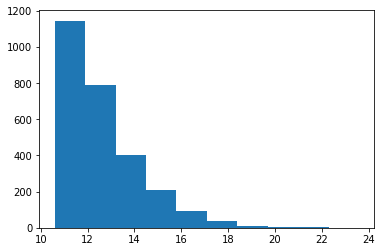

In [10]:
plt.hist(np.log(df["RegisteredCapital"]))
plt.show()

In [21]:
#Function to print summary statistics of data
def summ(X):
    print(f"\tMin: {min(X)}")
    print(f"\tQ1: {np.percentile(X,[25,50,75])[0]}")
    print(f"\tMedian: {np.percentile(X,[25,50,75])[1]}")
    print(f"\tMean: {round(sum(X)/len(X),1)}")    
    print(f"\tQ3: {np.percentile(X,[25,50,75])[2]}") 
    print(f"\tMax: {max(X)}")
print("Summary statistics of RegisteredCapital in DKK for 2758 Companies:")
summ(df["RegisteredCapital"])

Summary statistics of RegisteredCapital in DKK for 2758 Companies:
	Min: 40002.0
	Q1: 100000.0
	Median: 400000.0
	Mean: 12547543.2
	Q3: 627020.0
	Max: 17569715000.0


In [8]:
#Making a copy of the dataframe when changin "nan" to 0
dfc=df.copy()
for i in range(len(dfc)):
    if str(dfc["NumPeople"][i]) == "nan":
        dfc["NumPeople"][i] = 0
    if str(dfc["NumCars"][i]) == "nan":
        dfc["NumCars"][i] = 0

/home/julius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/julius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Sci-kit Learn used to analyse the data and create predictors

In [203]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression as Linear
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression as Logistic
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [9]:
#Create some versions of the data to potentially use
pca=PCA(n_components=1)
objects = dfc[["NumPeople","NumCars"]]
XX=pca.fit_transform(objects)
regcap = df["RegisteredCapital"]

In [160]:
XY=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],regcap)))
XY.columns =['NumCars', 'NumPeople', 'RegisteredCapital']
XY=XY.sort_values(by="RegisteredCapital",ignore_index=True)
p20=XY.loc[round(len(XY)*0.8):]
p80=XY.loc[:round(len(XY)*0.8)]
print(p20["RegisteredCapital"].sum(),p80["RegisteredCapital"].sum(),XY["RegisteredCapital"].sum(),p20["RegisteredCapital"].sum()/XY["RegisteredCapital"].sum())
print(len(p20),len(p80),len(p20)/len(XY),len(p80)/len(XY))

33259091849.38 607727204.9699999 33865819054.35 0.9820843782341043
540 2160 0.20007410151908114 0.8002964060763246


In [190]:
#Define wealthy company as >500000
wealthy=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 500000:
        wealthy[i]=1
    else:
        wealthy[i]=0
print((len(wealthy)-len([n for n in wealthy if n==1]))/len(wealthy))

0.6924786958132642


In [188]:
len([n for n in wealthy if n==1])

19

In [167]:
#Robust transformation
median_x = np.percentile(regcap,[25,50,75])[1]
q1 = np.percentile(regcap,[25,50,75])[0]
q3 = np.percentile(regcap,[25,50,75])[2]
regcap_T=[np.float64]*len(regcap)

for i in range(len(regcap)):
    regcap_T[i]=(regcap[i]-median_x)/(q3-q1)

In [18]:
summ(regcap_T)

	Min: -0.6830822359682744
	Q1: -0.5692383590755569
	Median: 0.0
	Mean: 23.0
	Q3: 0.43076164092444313
	Max: 33337.09346893856


In [367]:
#Linear regression on registere capital, logistic and Linear Discriminant Analysis for classifiers
reg = Linear()
reg.fit(objects,regcap_T)
print(reg.score(objects,regcap_T))
def mls(x,y):
    log = Logistic(class_weight="balanced")
    log.fit(x,y)
    print(f"f1: {f1_score(y,log.predict(x))}")
    print(f"p: {precision_score(y,log.predict(x))}")
    print(f"r: {recall_score(y,log.predict(x))}")
    print(log.score(x,y))
    lda=LDA()
    lda.fit(x,y)
    ldx=lda.transform(x)
    print(lda.score(x,y))
mls(objects[["NumCars","NumPeople"]],wealthy)

0.002880690519079687
f1: 0.4682630178639301
p: 0.34203220433092724
r: 0.7421686746987952
0.48165987402741756
0.6924786958132642


/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
print(objects["NumPeople"][0])
print(wealthy[0])
print(len([a[0] for a in zip(objects["NumPeople"],wealthy) if a[1]==0]))

1.0
0
1869


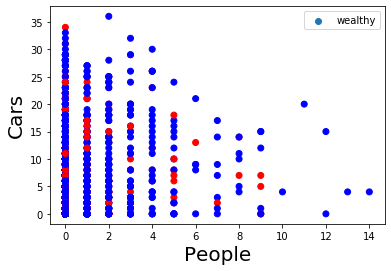

In [294]:
fig,ax=plt.subplots()
ax.scatter(objects["NumPeople"],objects["NumCars"],c=wealthy,cmap="bwr",label="wealthy")
ax.legend()
ax.set_xlabel("People",size=20)
ax.set_ylabel("Cars",size=20)
plt.show()

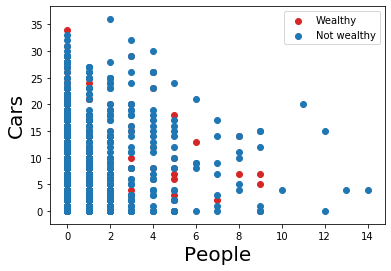

In [295]:
fig,ax=plt.subplots()
ax.scatter([a[0] for a in zip(objects["NumPeople"],wealthy) if a[1]==1],[a[0] for a in zip(objects["NumCars"],wealthy) if a[1]==1],c="tab:red",label="Wealthy")
ax.scatter([a[0] for a in zip(objects["NumPeople"],wealthy) if a[1]==0],[a[0] for a in zip(objects["NumCars"],wealthy) if a[1]==0],c="tab:blue",label="Not wealthy")
ax.legend()
ax.set_xlabel("People",size=20)
ax.set_ylabel("Cars",size=20)
plt.show()

In [301]:
objects=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy)))
objects.columns =['NumCars', 'NumPeople', 'Wealthy']
def splitter(obje):
    obj=[]
    obj.append(obje[(obje["NumCars"]<6) & (obje["NumPeople"]<6)])
    obj.append(obje[(obje["NumCars"]<6) & (obje["NumPeople"]>5) & (obje["NumPeople"]<11)])
    obj.append(obje[(obje["NumCars"]<6) & (obje["NumPeople"]>10) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>5) & (obje["NumCars"]<11) & (obje["NumPeople"]<6)])
    obj.append(obje[(obje["NumCars"]>5) & (obje["NumCars"]<11) & (obje["NumPeople"]>5) & (obje["NumPeople"]<11)])
    obj.append(obje[(obje["NumCars"]>5) & (obje["NumCars"]<11) & (obje["NumPeople"]>10) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>10) & (obje["NumCars"]<16) & (obje["NumPeople"]<6)])
    obj.append(obje[(obje["NumCars"]>10) & (obje["NumCars"]<16) & (obje["NumPeople"]>5) & (obje["NumPeople"]<11)])
    obj.append(obje[(obje["NumCars"]>10) & (obje["NumCars"]<16) & (obje["NumPeople"]>10) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>15) & (obje["NumCars"]<21) & (obje["NumPeople"]<6)])
    obj.append(obje[(obje["NumCars"]>15) & (obje["NumCars"]<21) & (obje["NumPeople"]>5) & (obje["NumPeople"]<11)])
    obj.append(obje[(obje["NumCars"]>15) & (obje["NumCars"]<21) & (obje["NumPeople"]>10) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>20) & (obje["NumCars"]<26) & (obje["NumPeople"]<6)])
    obj.append(obje[(obje["NumCars"]>20) & (obje["NumCars"]<26) & (obje["NumPeople"]>5) & (obje["NumPeople"]<11)])
    obj.append(obje[(obje["NumCars"]>20) & (obje["NumCars"]<26) & (obje["NumPeople"]>10) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>25) & (obje["NumCars"]<31) & (obje["NumPeople"]<6)])
    obj.append(obje[(obje["NumCars"]>25) & (obje["NumCars"]<31) & (obje["NumPeople"]>5) & (obje["NumPeople"]<11)])
    obj.append(obje[(obje["NumCars"]>25) & (obje["NumCars"]<31) & (obje["NumPeople"]>10) & (obje["NumPeople"]<15)])
    obj.append(obje[(obje["NumCars"]>30) & (obje["NumCars"]<37) & (obje["NumPeople"]<6)])
    obj.append(obje[(obje["NumCars"]>30) & (obje["NumCars"]<37) & (obje["NumPeople"]>5) & (obje["NumPeople"]<11)])
    obj.append(obje[(obje["NumCars"]>30) & (obje["NumCars"]<37) & (obje["NumPeople"]>10) & (obje["NumPeople"]<15)])
    return obj

In [298]:
len(obj[12])
#len(objects[(objects["NumCars"]>20)])# & (objects["NumPeople"]<26)])# & (objects["NumCars"]<6)])

61

In [313]:
value=[]
obj=splitter(objects)
for o in obj:
    if len(o)==0:
        value.append(o["Wealthy"].sum())
    else:
        value.append(o["Wealthy"].sum()/len(o))

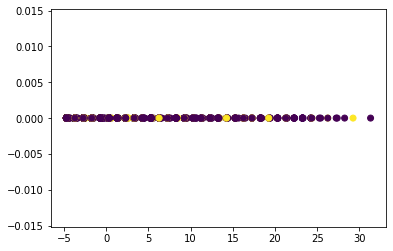

In [22]:
plt.scatter(XX,[0]*len(XX),c=wealthy)
plt.show()

In [84]:
plt.scatter(ldx,[0]*len(ldx),c=wealthy)
plt.show()

NameError: name 'ldx' is not defined

In [24]:
summ(objects["NumPeople"])
print("")
summ(objects["NumCars"])

	Min: 0.0
	Q1: 0.0
	Median: 0.0
	Mean: 0.4
	Q3: 0.0
	Max: 14.0

	Min: 0.0
	Q1: 0.0
	Median: 2.0
	Mean: 4.7
	Q3: 7.0
	Max: 36.0


In [192]:
objects2=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy)))
objects2.columns =['NumCars', 'NumPeople', 'Wealthy']
objects2=objects2.loc[(objects2["NumPeople"]!=0) | (objects2["NumCars"]!=0)]
1-len(objects2)/len(objects)

0.2819562801037421

In [79]:
summ(objects2["NumPeople"])
print("")
summ(objects2["NumCars"])

	Min: 0.0
	Q1: 0.0
	Median: 0.0
	Mean: 0.6
	Q3: 1.0
	Max: 14.0

	Min: 0.0
	Q1: 2.0
	Median: 4.0
	Mean: 6.6
	Q3: 9.0
	Max: 36.0


In [208]:
#Linear regression on registere capital, logistic and Linear Discriminant Analysis for classifiers
X = objects2[["NumCars","NumPeople"]]
Y = objects2["Wealthy"]
mls(X,Y)

f1: 0.44184752365052865
p: 0.32119741100323623
r: 0.7076648841354723
0.4824561403508772
0.7105263157894737


/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
objects_w=objects2[objects2["Wealthy"]==1]
objects_nw=objects2[objects2["Wealthy"]==0]

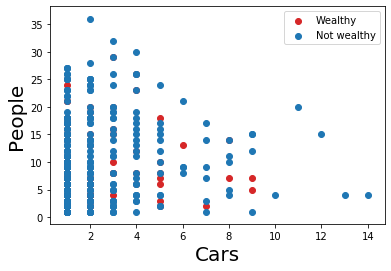

In [65]:
fig,ax=plt.subplots()
ax.scatter(objects_w["NumPeople"],objects_w["NumCars"],c="tab:red",label="Wealthy")
ax.scatter(objects_nw["NumPeople"],objects_nw["NumCars"],c="tab:blue",label="Not wealthy")
ax.legend()
ax.set_xlabel("Cars",size=20)
ax.set_ylabel("People",size=20)
plt.show()

## Different Threshholds

In [211]:
wealthy2=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 200000:
        wealthy2[i]=1
    else:
        wealthy2[i]=0
print((len(wealthy2)-len([n for n in wealthy2 if n==1]))/len(wealthy2),len([n for n in wealthy2 if n==1]))

wealthy3=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 1000000:
        wealthy3[i]=1
    else:
        wealthy3[i]=0
print((len(wealthy3)-len([n for n in wealthy3 if n==1]))/len(wealthy3),len([n for n in wealthy3 if n==1]))

wealthy4=[int]*len(regcap)
for i,cap in enumerate(regcap):
    if cap > 100000000:
        wealthy4[i]=1
    else:
        wealthy4[i]=0
print((len(wealthy4)-len([n for n in wealthy4 if n==1]))/len(wealthy4),len([n for n in wealthy4 if n==1]))

0.4668395702111893 1439
0.8266024453501297 468
0.9929603556872916 19


In [370]:
print(len([a for a in wealthy2 if a == 1])/len(wealthy2))

0.5331604297888106


In [368]:
print("200000:")
mls(objects[["NumCars","NumPeople"]],wealthy2)
print("1000000:")
mls(objects[["NumCars","NumPeople"]],wealthy3)
print("100000000:")
mls(objects[["NumCars","NumPeople"]],wealthy4)

200000:
f1: 0.6369230769230769
p: 0.571507454445058
r: 0.7192494788047255
0.5628010374212671
0.56168951463505
1000000:
f1: 0.30225364560318163
p: 0.1905292479108635
r: 0.7307692307692307
0.4149685068543905
0.8266024453501297
100000000:
f1: 0.024258760107816708
p: 0.012448132780082987
r: 0.47368421052631576
0.731752500926269
0.9929603556872916


/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/julius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [304]:
objects3=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy2)))
objects3.columns =['NumCars', 'NumPeople', 'Wealthy']

In [312]:
value2=[]
obj=splitter(objects3)
for o in obj:
    if len(o)==0:
        value2.append(o["Wealthy"].sum())
    else:
        value2.append(o["Wealthy"].sum()/len(o))

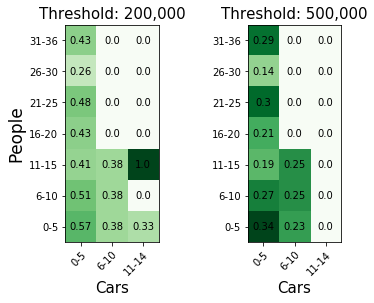

In [355]:
People = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-36"]
People.reverse()
Cars = ["0-5", "6-10", "11-14"]

vlue = []
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value2[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

fig, (ax1, ax2) = plt.subplots(1,2)
im = ax1.imshow(vlue,cmap="Greens")
# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(Cars)))
ax1.set_yticks(np.arange(len(People)))

ax1.set_xticklabels(Cars)
ax1.set_yticklabels(People)
ax1.set_xlabel("Cars", size=15)
ax1.set_ylabel("People", size=17)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(People)):
    for j in range(len(Cars)):
        text = ax1.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax1.set_title("Threshold: 200,000", size=15)

vlue = []
for i in range(7):
    v=[]
    for j in range(3):
        v.append(round(value[i*3+j],2))
    vlue.append(v)
vlue.reverse()
vlue = np.array(vlue,dtype=np.float)

#fig, ax = plt.subplots()
im = ax2.imshow(vlue,cmap="Greens")

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(len(Cars)))
ax2.set_yticks(np.arange(len(People)))

ax2.set_xticklabels(Cars)
ax2.set_yticklabels(People)
ax2.set_xlabel("Cars", size=15)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(People)):
    for j in range(len(Cars)):
        text = ax2.text(j, i, vlue[i, j],
                       ha="center", va="center", color="black")

ax2.set_title("Threshold: 500,000", size=15)
plt.show()

# Ignore

In [82]:
aa=objects2[objects2["NumCars"]>8]
aa=aa[aa["NumPeople"]>2]
ab=objects2[objects2["NumCars"]>8]
ab=ab[ab["NumPeople"]<=2]
ba=objects2[objects2["NumCars"]<=8]
ba=ba[ba["NumPeople"]>2]
bb=objects2[objects2["NumCars"]<=8]
bb=bb[bb["NumPeople"]<=2]
print(len(aa[aa["Wealthy"]==1])/len(aa))
print(len(ab[ab["Wealthy"]==1])/len(ab))
print(len(ba[ba["Wealthy"]==1])/len(ba))
print(len(bb[bb["Wealthy"]==1])/len(bb))
print("")
print(len(aa))
print(len(ab))
print(len(ba))
print(len(bb))

0.1935483870967742
0.212253829321663
0.2261904761904762
0.3243445692883895

62
457
84
1335


In [83]:
objects3=pd.DataFrame(list(zip(objects["NumCars"],objects["NumPeople"],wealthy)))
objects3.columns =['NumCars', 'NumPeople', 'Wealthy']
aa=objects3[objects3["NumCars"]>2]
aa=aa[aa["NumPeople"]>0]
ab=objects3[objects3["NumCars"]>2]
ab=ab[ab["NumPeople"]<=0]
ba=objects3[objects3["NumCars"]<=2]
ba=ba[ba["NumPeople"]>0]
bb=objects3[objects3["NumCars"]<=2]
bb=bb[bb["NumPeople"]<=0]
print(len(aa[aa["Wealthy"]==1])/len(aa))
print(len(ab[ab["Wealthy"]==1])/len(ab))
print(len(ba[ba["Wealthy"]==1])/len(ba))
print(len(bb[bb["Wealthy"]==1])/len(bb))
print("")
print(len(aa))
print(len(ab))
print(len(ba))
print(len(bb))

0.2417910447761194
0.2782608695652174
0.3028571428571429
0.3467297084318361

335
920
175
1269
